In [1]:
# I cannot pip install on the Hub
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt


import het_cov

In [2]:
#cov_file = '/home/jovyan/work/hetdex/data/cov_calfib_ffsky.h5'
cov_file = '/home/qezlou/HD1/data_het/data/emmission/cov_calfib_ffsky.h5'
with h5py.File(cov_file, 'r') as f:
    shotids = f['shotid'][:]
    cov = f['cov_calfib_ffsky'][:]
print(cov.shape, shotids.shape)

(808, 1036, 1036) (808,)


In [3]:
with h5py.File('/home/qezlou/HD1/data_het/data/emmission/wave.h5', 'r') as f:
    wave = f['wave'][:]

In [4]:
def get_corr(cov_matrices):

    corr_matrices = np.zeros_like(cov_matrices)
    for i in range(corr_matrices.shape[0]):
        # Compute standard deviations of each pixel
        std_devs = np.sqrt(np.diag(cov_matrices[i]))
    
        # Avoid division by zero
        std_devs[std_devs == 0] = 1e-10
    
        # Compute correlation matrix
        corr_matrices[i] = cov_matrices[i] / np.outer(std_devs, std_devs)
        
    return corr_matrices
corr = get_corr(cov)

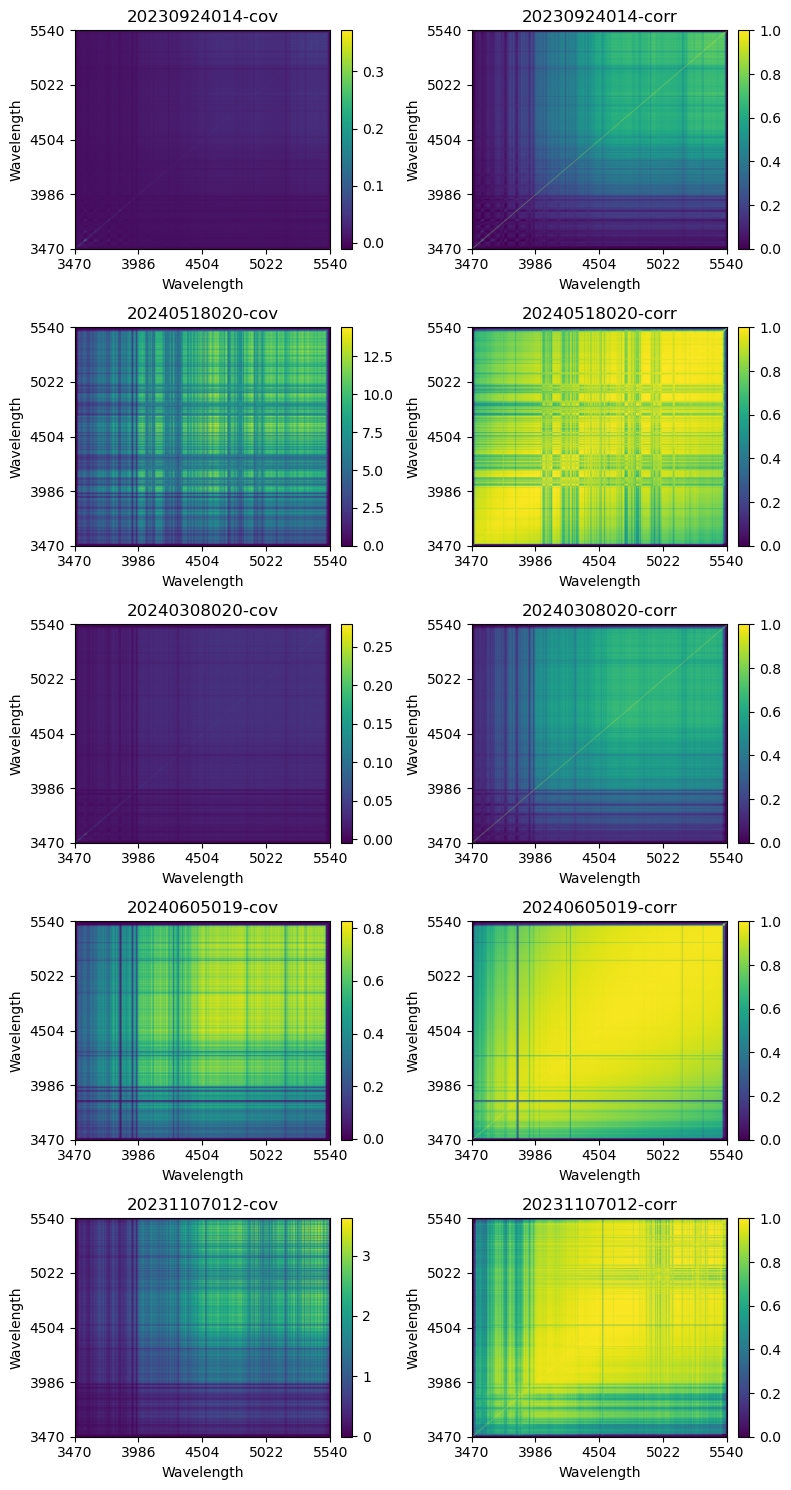

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

fig, ax = plt.subplots(5, 2, figsize=(8, 15))
ind_rand = np.random.randint(0, shotids.size, 5)

N = wave.shape[0]  # assuming square covariance matrices of shape (N, N)

# Pick ~5 log-spaced ticks across the full wave range
num_ticks = 5
tick_indices = np.linspace(0, N - 1, num_ticks, dtype=int)
tick_positions = [wave[i] for i in tick_indices]
tick_labels = [f"{wave[i]:.0f}" for i in tick_indices]

# Loop over each shot
for i, ind in enumerate(ind_rand):
    ax[i, 0].set_title(f'{shotids[ind]}-cov')
    ax[i, 1].set_title(f'{shotids[ind]}-corr')

    # Show images with wavelength-scaled axes using 'extent'
    im0 = ax[i, 0].imshow(cov[ind, :, :], origin='lower', cmap='viridis',
                          aspect='auto', extent=[wave[0], wave[-1], wave[0], wave[-1]])
    im1 = ax[i, 1].imshow(corr[ind, :, :], origin='lower', cmap='viridis', vmin=0, vmax=1,
                          aspect='auto', extent=[wave[0], wave[-1], wave[0], wave[-1]])

    # Set wavelength ticks and labels
    for a in [ax[i, 0], ax[i, 1]]:
        a.set_xticks(tick_positions)
        a.set_xticklabels(tick_labels)
        a.set_yticks(tick_positions)
        a.set_yticklabels(tick_labels)
        a.set_xlabel("Wavelength")
        a.set_ylabel("Wavelength")

    fig.colorbar(im0, ax=ax[i, 0], fraction=0.046, pad=0.04)
    fig.colorbar(im1, ax=ax[i, 1], fraction=0.046, pad=0.04)

fig.tight_layout()

/tmp/ipykernel_2049496/3010925929.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


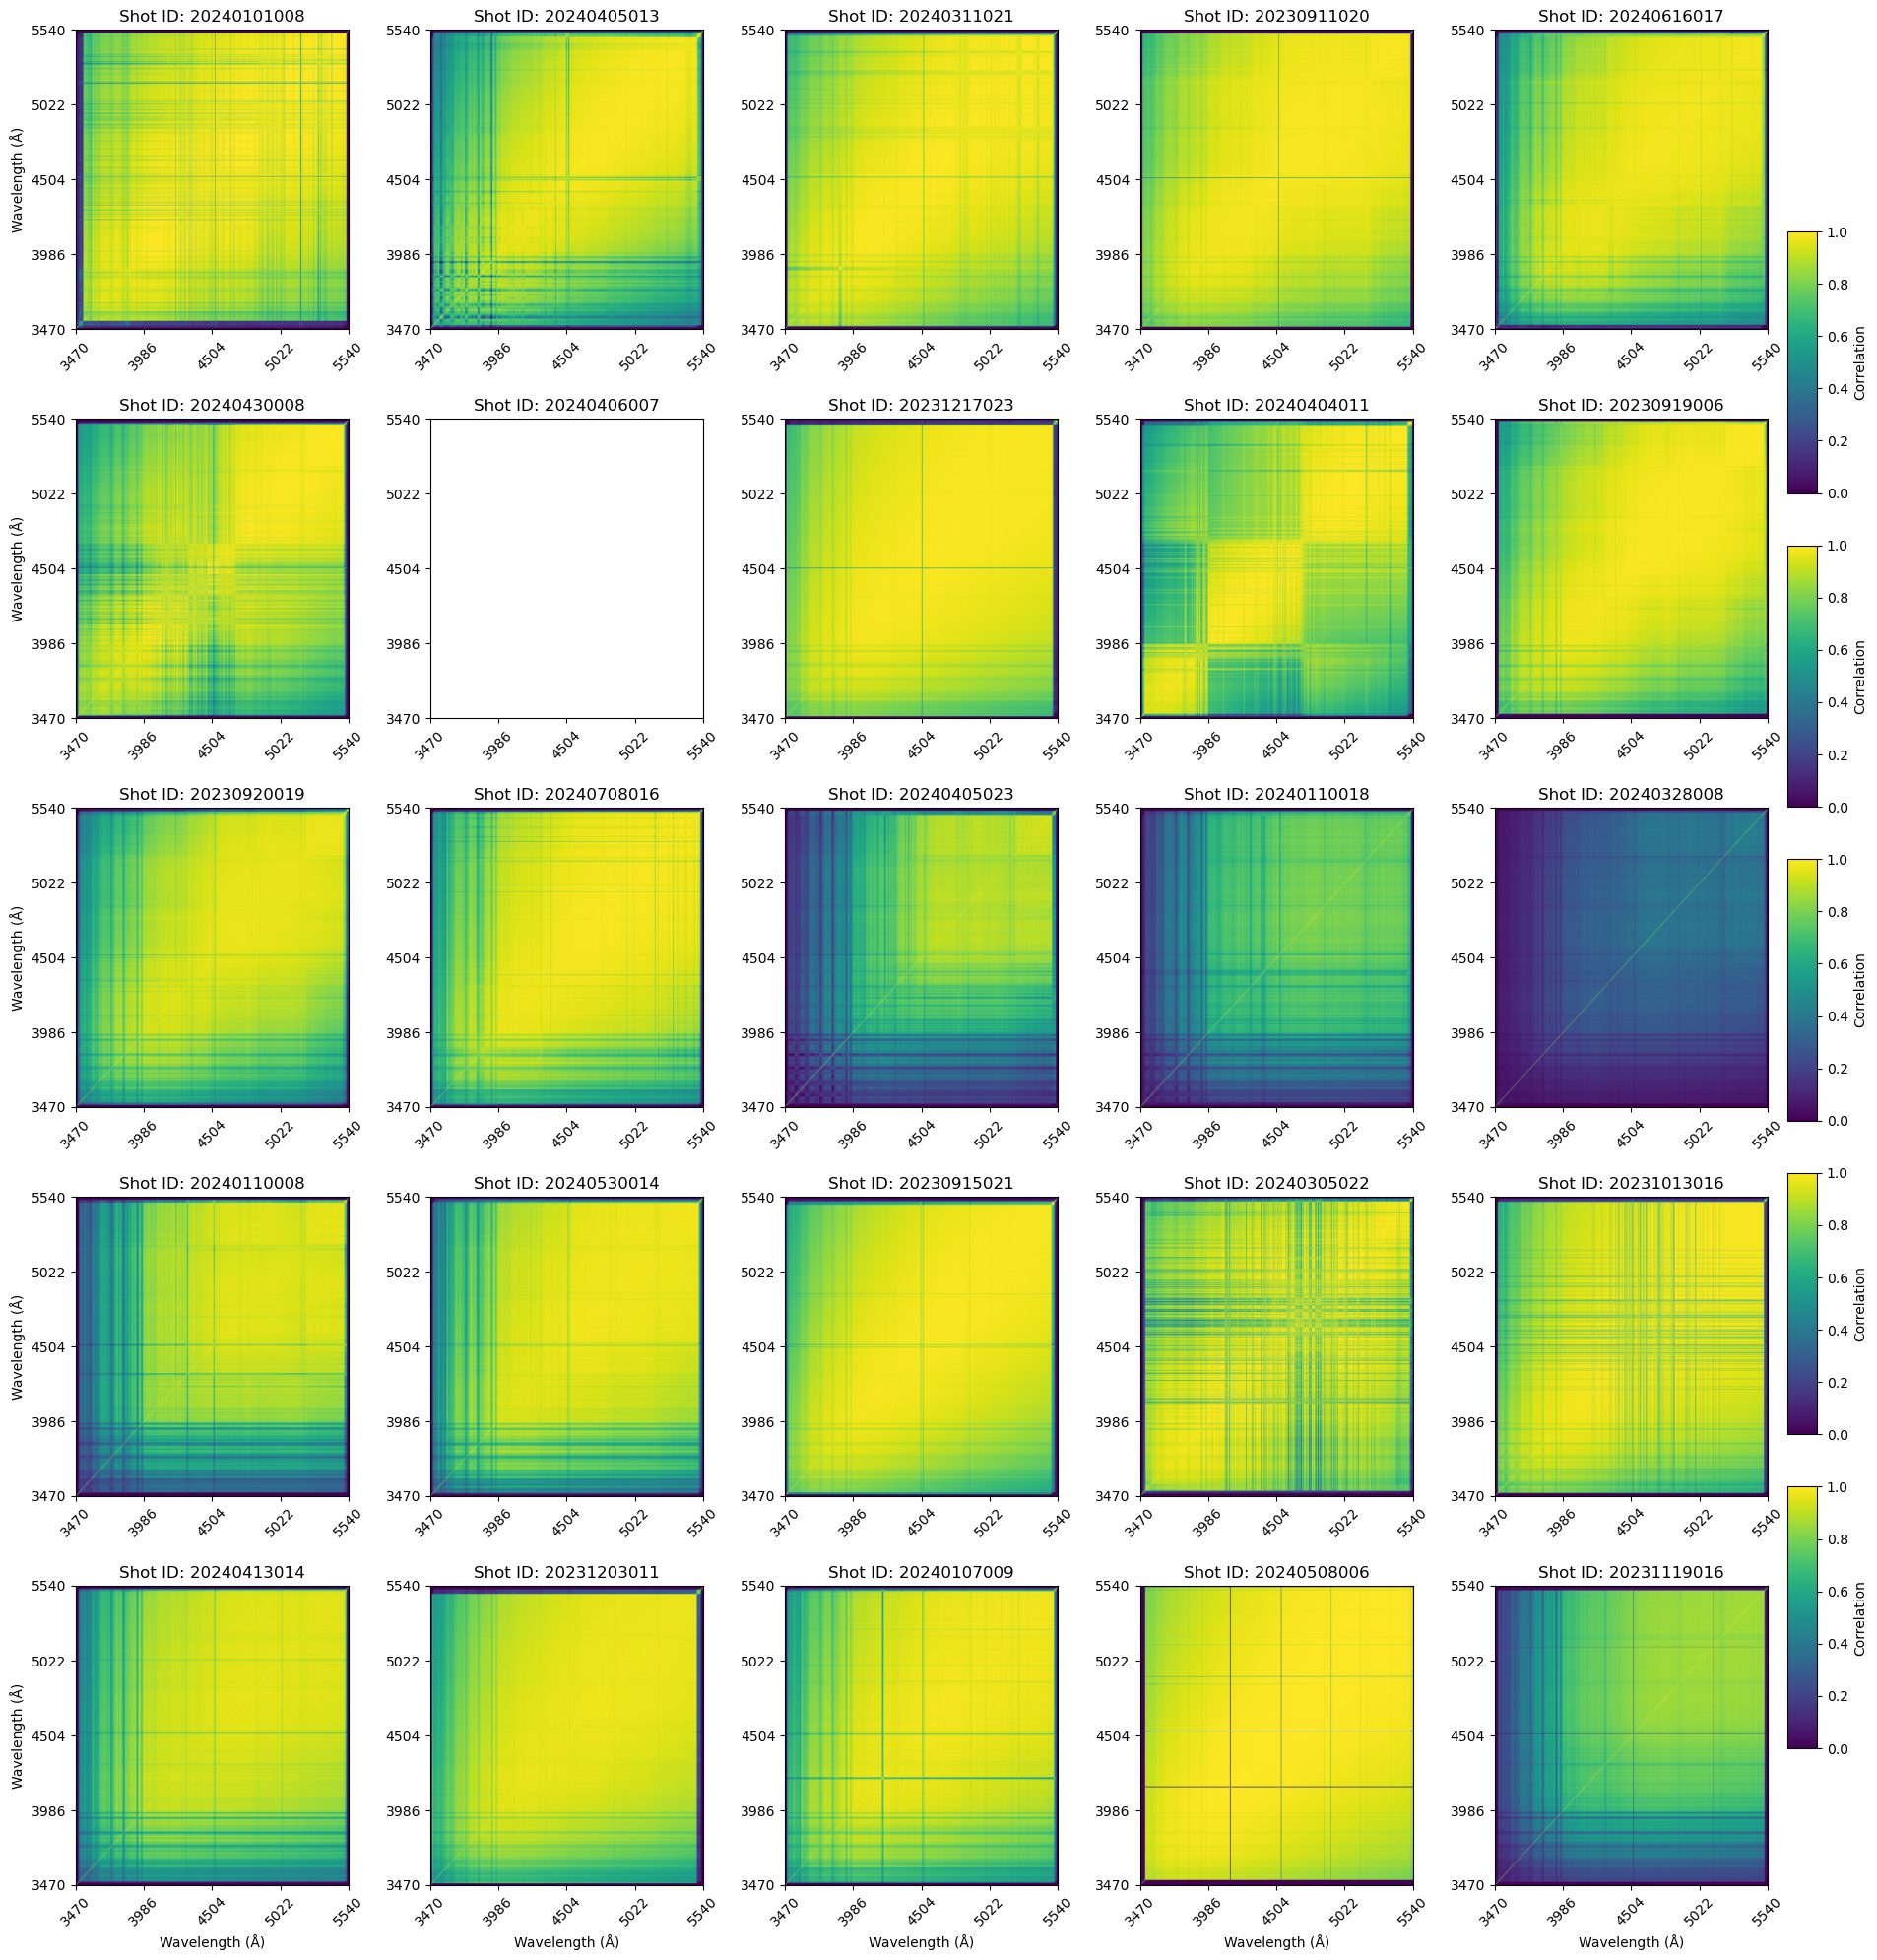

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
ind_rand = np.random.randint(0, shotids.size, 25)

N = wave.shape[0]  # assuming square covariance matrices of shape (N, N)

# Pick ~5 log-spaced ticks across the full wave range
num_ticks = 5
tick_indices = np.linspace(0, N - 1, num_ticks, dtype=int)
tick_positions = [wave[i] for i in tick_indices]
tick_labels = [f"{wave[i]:.0f}" for i in tick_indices]

# Flatten the axes array for easier iteration
axes_flat = axes.flatten()

# Loop over each shot
for i, ind in enumerate(ind_rand):
    # Plot correlation matrix
    im = axes_flat[i].imshow(corr[ind, :, :], origin='lower', cmap='viridis', vmin=0, vmax=1,
                        aspect='auto', extent=[wave[0], wave[-1], wave[0], wave[-1]])
    
    axes_flat[i].set_title(f'Shot ID: {shotids[ind]}')
    
    # Set wavelength ticks and labels
    axes_flat[i].set_xticks(tick_positions)
    axes_flat[i].set_xticklabels(tick_labels, rotation=45)
    axes_flat[i].set_yticks(tick_positions)
    axes_flat[i].set_yticklabels(tick_labels)
    
    # Only add axis labels on the edge plots
    if i % 5 == 0:  # Left edge
        axes_flat[i].set_ylabel("Wavelength (Å)")
    if i >= 20:  # Bottom edge
        axes_flat[i].set_xlabel("Wavelength (Å)")

# Add colorbar to each row, positioned at the right side
for row in range(5):
    # Get the last plot in the row
    last_ax_in_row = axes[row, -1]
    # Create a new axis for the colorbar at the right of the last plot
    cbar_ax = fig.add_axes([last_ax_in_row.get_position().x1 + 0.01, 
                           last_ax_in_row.get_position().y0,
                           0.015,
                           last_ax_in_row.get_position().height])
    # Add the colorbar
    fig.colorbar(im, cax=cbar_ax, label='Correlation')

plt.tight_layout()
# Adjust layout to make room for colorbars
plt.subplots_adjust(right=0.9, hspace=0.3, wspace=0.3)